Step 1: 2D Data Generalization and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt #importing the libraries

In [2]:
np.random.seed(42)

In [3]:
mean1=[1,1] #two categories of data points having mean of (1,1) and (5,5) respectively.
mean2=[5,5] #standard deviation is 1.  
sd=1


In [4]:
d1=np.random.normal(loc=mean1,scale=sd,size=(100,2))
d2=np.random.normal(loc=mean2,scale=sd,size=(100,2)) #generating 2 categories of data

In [5]:
d=np.vstack([d1,d2]) #combining into single dataset


In [6]:
labels=np.hstack([np.zeros(100),np.ones(100)])

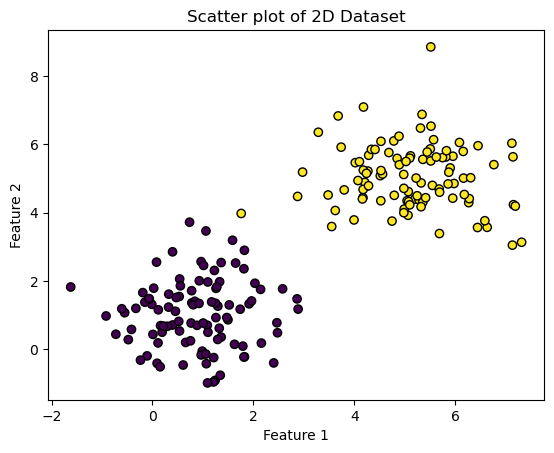

In [7]:
plt.scatter(d[:,0],d[:,1],c=labels,cmap='viridis',edgecolors='k') #visualisation of 2D dataset
plt.title('Scatter plot of 2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Step 2: Helper Function and Visualization

In [8]:
def euclid(p1,p2): #defining Euclidean helper function
    return np.sqrt(np.sum((p1-p2)**2))

               

In [9]:
def initcentroid(dataset,k): #defining function to initialise the centroids
    indices=np.random.choice(len(dataset),k,replace=False)
    centroids=dataset[indices]
    return centroids

In [10]:
k=2

In [11]:
initital_centroids=initcentroid(d,k)

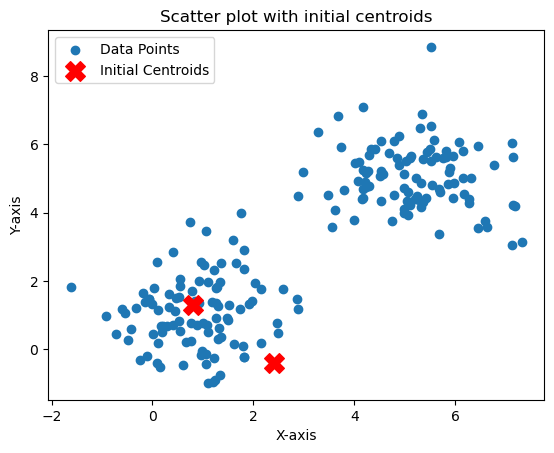

In [12]:
plt.scatter(d[:,0],d[:,1],label='Data Points') #Initialize and plot Centroids
plt.scatter(initital_centroids[:,0],initital_centroids[:,1],marker='X',s=200,color='red',label='Initial Centroids')
plt.title('Scatter plot with initial centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

Step 3: K-means Implementation

In [13]:
def assigncluster(dataset, centroids): #defining function to assign each point to its nearest centroids
    distances=np.array([np.linalg.norm(dataset-i,axis=1) for i in centroids])
    clusters=np.argmin(distances,axis=0)
    return clusters

In [14]:
def update(dataset,clusters,k): # defining function to update centroids based on the mean of assigned points.
    newcentroids=np.array([np.mean(dataset[clusters==j],axis=0) for j in range(k)])
    return newcentroids


In [15]:
def kmeans(dataset,k,maxiter=1000): #implementing k-means algorithm
    centroids=initcentroid(dataset,k)
    for i in range(maxiter):
        clusters=assigncluster(dataset,centroids) #assign each point to the nearest centroid
        newcentroids=update(dataset,clusters,k) #updating centroids based on the mean of assigned points
        
        if np.all(centroids==newcentroids): #checking for convergence
            break
        centroids=newcentroids
        
    return centroids,clusters

    

In [16]:
finalc,finalclusters=kmeans(d,k=2) #Applying K-means using with k=2

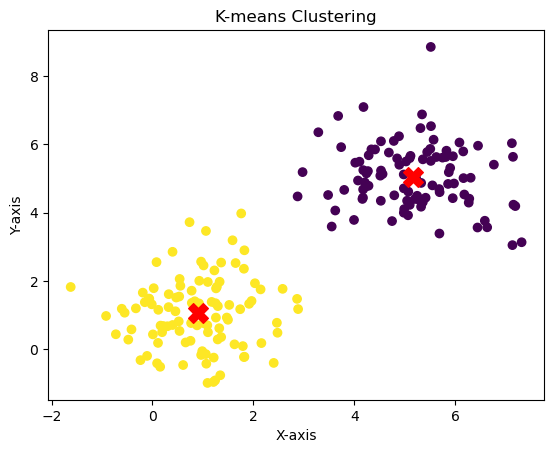

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


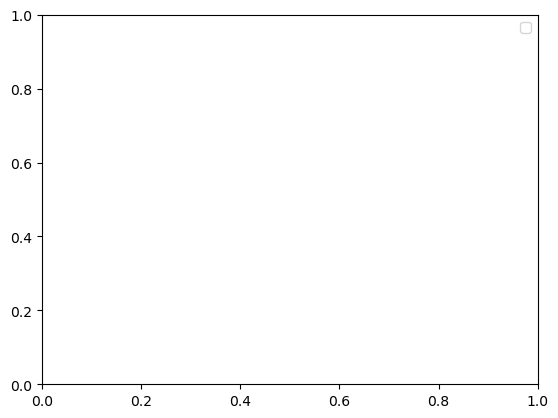

In [17]:
plt.scatter(d[:,0],d[:,1],c=finalclusters,cmap='viridis',label='DataPoints') #Visualization of the data
plt.scatter(finalc[:,0],finalc[:,1],marker='X',s=200,color='red',label='Final Centroids')
plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
plt.legend()


Step 4: Training Implemented K-Menas on MNIST dataset

In [18]:
import datetime #importing the packages for implementing K-Means on MNIST dataset
import pandas as pd
import tensorflow as tf
from sklearn.cluster import KMeans


2023-12-07 17:48:21.872346: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #importing the data
x_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0 #normalizing pixel values to range[0,1]
print("Training data shape:", x_train_flat.shape)
print("Testing data shape:", x_test_flat.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [20]:
k=10
starttime=datetime.datetime.now() #starting with k=10, computing the training time

In [21]:
kmeans=KMeans(n_clusters=k,random_state=42)
kmeans.fit(x_train_flat) #implementing K-means on the training data, assuming the data is flattened

/Users/prayashdas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

In [22]:
endtime=datetime.datetime.now()

In [23]:
traintime=endtime-starttime
print('Training Time: ',traintime) #Training time

Training Time:  0:00:21.387843


In [24]:
clusterlabels=kmeans.labels_
centroids=kmeans.cluster_centers_ #cluster labels and centroids

In [25]:
print(centroids) #cluster centroids

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Step5: Mini Batch K-means

In [26]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [27]:
knumbers=[10,16,64,265] #different valus of k
bestmodel=None
bestinertia=float('inf')
#Training MiniBatchKMeans models with different cluster numbers

In [28]:
for i in knumbers:
    kmeans_model=MiniBatchKMeans(n_clusters=i,random_state=42,batch_size=100).fit(x_train_flat) #Initialize and training the model
    inertia=kmeans_model.inertia_ #Calculating the  inertia (sum of squared distances to the nearest cluster center)
    if inertia<bestinertia:
        bestinertia=inertia
        bestmodel=kmeans_model #Comparing and updating the best model
    print(f'K={i}, Inertia={inertia}')
    

/Users/prayashdas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


K=10, Inertia=2385778.0


/Users/prayashdas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


K=16, Inertia=2221511.25


/Users/prayashdas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


K=64, Inertia=1816471.0


/Users/prayashdas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


K=265, Inertia=1509974.5


In [29]:
test_labels=bestmodel.predict(x_test_flat)
#Applying the best model to the test dataset

In [30]:
test_inertia=pairwise_distances_argmin_min(x_test_flat,bestmodel.cluster_centers_)[1].sum() #Computing Best Model Inertia
print(f'Best Model Inertia on Test Dataset: {test_inertia}')

Best Model Inertia on Test Dataset: 48944.48495032822
